# Convolutional Neural Networks

## steps we follow

- multiple convolutional layers
- max pooling between conv layers
- flattern 
- fully connected layer 
- dropout
- output layer

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
    
def createModel(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
     
    return model

## Cifar10 data

In [2]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape)
print(x_train.shape[0])
print(x_test.shape[0])

print (y_test[0])
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
print (y_test[0])

(50000, 32, 32, 3)
50000
10000
[3]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


## visualize the data

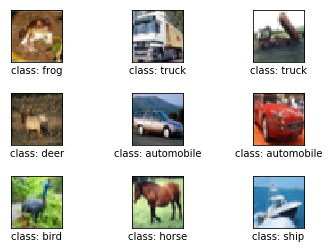

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig, axes = plt.subplots(3, 3)
fig.subplots_adjust(hspace=0.6, wspace=0.3)

for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i])

    xlabel = "class: {0}".format(class_names[y_train[i].argmax()])

    # Show the classes as the label on the x-axis.
    ax.set_xlabel(xlabel)

    # Remove ticks from the plot.
    ax.set_xticks([])
    ax.set_yticks([])


## Normalize the pixel data 

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## decide the model, loss, optimizer...

In [5]:
opt = tf.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

model = createModel(x_train.shape[1:])

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
__________

## FIRE UP THE TRAINING

In [7]:
import time

start_time = time.time()

%time model.fit(x_train, y_train, batch_size=32,epochs=10, validation_data=(x_test, y_test), shuffle=True)

elapsed_time = time.time() - start_time

print(elapsed_time)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 59s 1ms/step - loss: 1.9929 - acc: 0.2367 - val_loss: 1.7547 - val_acc: 0.3548
Epoch 2/10
50000/50000 [==============================] - 56s 1ms/step - loss: 1.6977 - acc: 0.3681 - val_loss: 1.5074 - val_acc: 0.4393
Epoch 3/10
50000/50000 [==============================] - 56s 1ms/step - loss: 1.5361 - acc: 0.4296 - val_loss: 1.4301 - val_acc: 0.4723
Epoch 4/10
50000/50000 [==============================] - 56s 1ms/step - loss: 1.4250 - acc: 0.4777 - val_loss: 1.3653 - val_acc: 0.4965
Epoch 5/10
50000/50000 [==============================] - 56s 1ms/step - loss: 1.3295 - acc: 0.5177 - val_loss: 1.2275 - val_acc: 0.5491
Epoch 6/10
50000/50000 [==============================] - 57s 1ms/step - loss: 1.2566 - acc: 0.5459 - val_loss: 1.1391 - val_acc: 0.5845
Epoch 7/10
50000/50000 [==============================] - 57s 1ms/step - loss: 1.1958 - acc: 0.5708 - val_loss: 1.0967 - val_acc

Well, that's interesting - even though this model is much more complex, it ran in about half the time. Is it also more accurate?

In [8]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 4s 384us/step
Test loss: 0.9643840456008911
Test accuracy: 0.6609


It is! Our original CNN achieved 60% accuracy, and we're up to 63% now - even with all those MaxPooling layers that *removed* quite a bit of information along the way. So, with MaxPooling2D we sped up our processing considerably - and by improving our topology, we didn't have to pay a price in accuracy or speed of convergence.

What's really nice is that our faster model means we can run more epochs, and get better accuracy, in a reasonable amount of time. Let's let it go for 50 epochs and see how good accuracy gets.

In [10]:
start_time = time.time()

%time model.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_test, y_test), shuffle=True)

elapsed_time = time.time() - start_time

print(elapsed_time)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 55s 1ms/step - loss: 1.0256 - acc: 0.6364 - val_loss: 0.9844 - val_acc: 0.6498
Epoch 2/50
50000/50000 [==============================] - 56s 1ms/step - loss: 0.9952 - acc: 0.6471 - val_loss: 0.8960 - val_acc: 0.6845
Epoch 3/50
50000/50000 [==============================] - 56s 1ms/step - loss: 0.9650 - acc: 0.6578 - val_loss: 0.8968 - val_acc: 0.6810
Epoch 4/50
50000/50000 [==============================] - 56s 1ms/step - loss: 0.9402 - acc: 0.6674 - val_loss: 0.9042 - val_acc: 0.6804
Epoch 5/50
50000/50000 [==============================] - 57s 1ms/step - loss: 0.9162 - acc: 0.6759 - val_loss: 1.0906 - val_acc: 0.6287
Epoch 6/50
50000/50000 [==============================] - 58s 1ms/step - loss: 0.8936 - acc: 0.6855 - val_loss: 0.8100 - val_acc: 0.7156
Epoch 7/50
50000/50000 [==============================] - 57s 1ms/step - loss: 0.8708 - acc: 0.6936 - val_loss: 0.8330 - val_acc

In [11]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 4s 384us/step
Test loss: 0.5996319761753083
Test accuracy: 0.8069


## let's see, what we have missed!

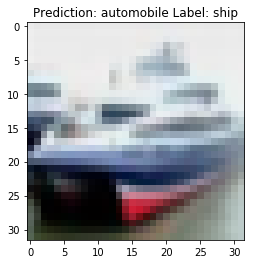

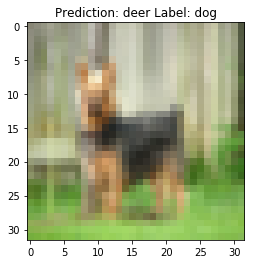

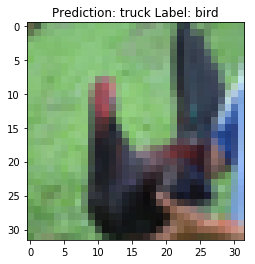

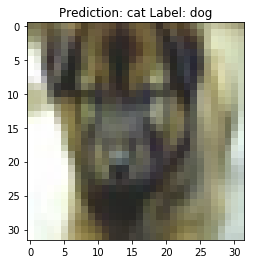

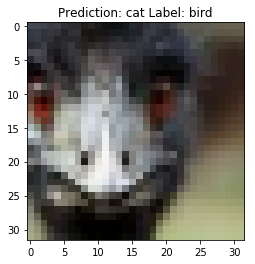

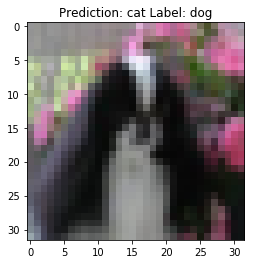

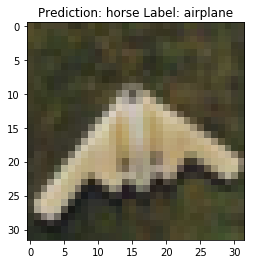

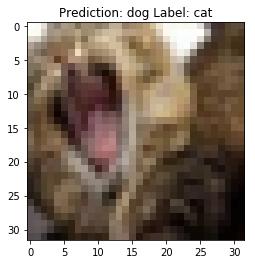

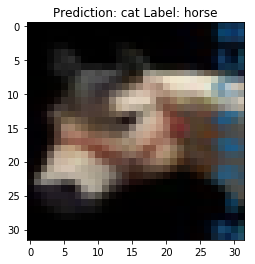

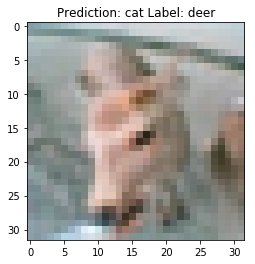

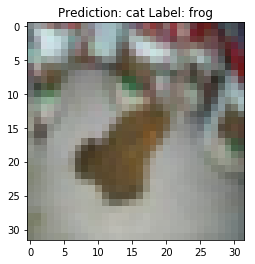

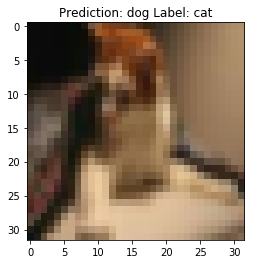

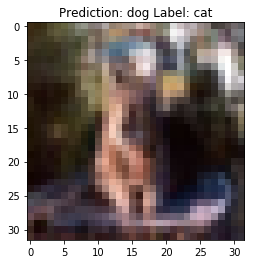

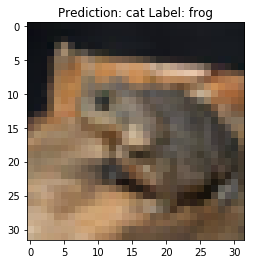

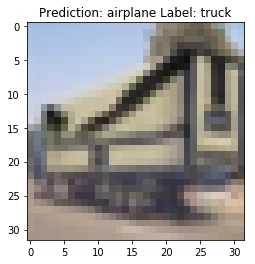

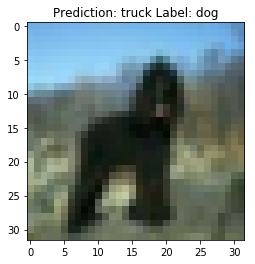

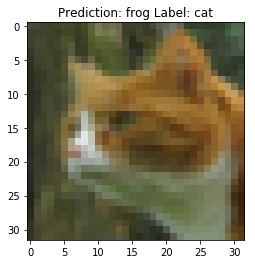

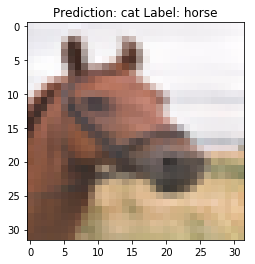

In [12]:
for x in range(100):
    test_image = x_test[x,:]
    predicted_cat = model.predict(np.array([test_image])).argmax()
    label = y_test[x].argmax()
    if (predicted_cat != label):
        plt.title('Prediction: %s Label: %s' % (class_names[predicted_cat], class_names[label]))
        plt.imshow(test_image)
        plt.show()